2.	욕설 감지 데이터셋

데이터
- 일간베스트(일베), 오늘의 유머와 같은 각종 커뮤니티 사이트의 댓글에 대해 총 5,825문장을 분류했습니다.
- 수직선 기호( | )를 기준으로 좌측에는 댓글 내용, 우측에는 욕설 여부(0,1)가 기록되어 있습니다.
- '존맛', '개이득' 등의 말은 비속어를 포함하고 있으므로 욕설이라 볼 수 있으나 최근에는 강조의 의미로 흔히 쓰이고 있으므로 악의가 없는 단순 강조의 의미로 쓰였다고 판단될 경우 욕설로 분류하지 않았습니다.
- 상황에 따라 욕일 수도 있고, 아닐 수도 있는 댓글은 최대한 비욕설로 구분했습니다.
- 출처 : https://github.com/2runo/Curse-detection-data

In [2]:
!git clone https://github.com/2runo/Curse-detection-data

Cloning into 'Curse-detection-data'...


In [1]:
import csv
import pandas as pd
contents = []

with open('Curse-detection-data/dataset.txt', 'r',encoding='UTF8') as f:
    reader = csv.reader(f, delimiter = '\t')
    for row in f:
        contents.append(row.split('|'))

In [2]:
df = pd.DataFrame(contents, columns=['document','label','none'])
df

,document,label,none
0,좌배 까는건 ㅇㅂ,1\n,None
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0\n,None
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1\n,None
3,세탁이라고 봐도 된다,0\n,None
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1\n,None
...,...,...,...
5820,좌우 헬파이어 3개씩 6개 장착에 아파치보다 약하지만 20mm 기관포 장착임,0\n,None
5821,"세금 내놓으라고 데모질 중 ㅋㅋ간첩, 도둑놈 새끼들이 대통령 해처먹으니까 나도 같...",1\n,None
5822,너가 한 말 중에,0\n,None
5823,제갈대중 ㅇㅂ,0\n,None


# label 값 \n 처리 , none 열 삭제

In [3]:
df[df['label'].apply(lambda x: '한경' in x)]

,document,label,none
455,여자 형제 둔 남성 보수 성향 강해… 美조사,한경닷컴 - 한국경제여자 형제가 인생을 더 행복하게 만든다 - 동아일보여자 형제 ...,0\n


In [4]:
df.drop(455, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df['label'] = df['label'].apply(lambda x : int(x.replace("\n","")))

In [6]:
df.drop('none',axis=1,inplace=True)

In [7]:
df['label'].value_counts()

0    3780
1    2044
Name: label, dtype: int64

# 참고 : https://wikidocs.net/94748

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
df['document'].nunique(),df['label'].nunique() 

(5824, 2)

In [10]:
print(df.isnull().values.any())

False


In [11]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 4368
테스트용 리뷰의 개수 : 1456


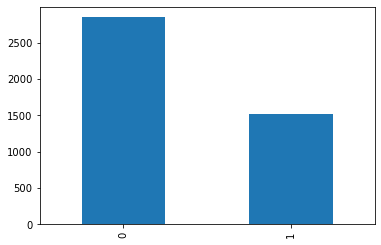

In [12]:
train_data['label'].value_counts().plot(kind = 'bar')

# 토큰화

1. Mecab

# 불용어 제거 
- stopwords 생성
- 갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업 필요
- 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어

In [13]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [14]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")


train_data['tokenized'] = train_data['document'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['document'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-14-ff1de90eb13d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['document'].apply(mecab.morphs)
<ipython-input-14-ff1de90eb13d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
<ipython-input-14-ff1de90eb13d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

# 단어와 길이 분포 확인

In [15]:
positive_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
negative_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [16]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('ㅋㅋㅋ', 818), ('.', 660), ('?', 354), ('거', 342), ('ㅋㅋ', 316), ('새끼', 274), ('있', 236), ('아', 188), ('안', 180), ('냐', 175), ('나', 170), ('보', 165), ('니', 147), ('어', 146), ('존나', 142), ('없', 142), ('같', 140), ('는데', 139), ('말', 136), ('일', 135)]


In [17]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('.', 1052), ('?', 576), ('ㅋㅋㅋ', 364), ('있', 343), ('거', 333), ('ㅋㅋ', 294), ('냐', 242), ('안', 223), ('없', 218), ('나', 216), ('는데', 199), (',', 172), ('에서', 164), ('말', 160), ('으로', 158), ('아', 155), ('아니', 153), ('로', 152), ('보', 148), ('..', 145)]


부정 리뷰의 평균 길이 : 18.443129520052597
긍정 리뷰의 평균 길이 : 10.814892869687391


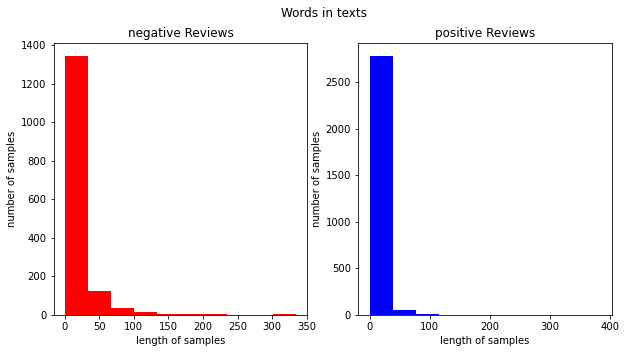

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('negative Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('positive Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [19]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

# 정수 인코딩

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [21]:
tokenizer.word_counts

OrderedDict([('안', 403),
             ('그래도', 28),
             ('요즘', 35),
             ('숙박업', 1),
             ('울상', 1),
             ('일텐데', 1),
             ('.', 1712),
             ('.....', 4),
             ('33', 1),
             ('오', 69),
             ('모이', 3),
             ('말', 296),
             ('시', 77),
             ('키', 20),
             ('아', 343),
             ('그냥', 131),
             ('홀딩', 1),
             ('세요', 24),
             ('빙신', 4),
             ('!', 146),
             ('!!!!!', 4),
             ('저', 138),
             ('꾸', 5),
             ('피지컬', 1),
             ('한국어', 1),
             ('좀', 107),
             ('배워서', 6),
             ('김치', 19),
             ('처먹', 17),
             ('어도', 36),
             ('월', 24),
             ('10', 36),
             ('억', 37),
             ('간단', 2),
             ('땡기', 2),
             ('는데', 338),
             ('왜', 122),
             ('힘들', 20),
             ('몸', 18),
             ('파', 9),
         

In [22]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10434
등장 빈도가 1번 이하인 희귀 단어의 수: 5995
단어 집합에서 희귀 단어의 비율: 57.45639256277554
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.188300873525712


In [23]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4441


In [24]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# 패딩

리뷰의 최대 길이 : 384
리뷰의 평균 길이 : 13.471153846153847


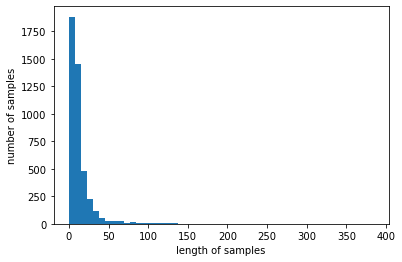

In [25]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [27]:
max_len = 300
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 99.93131868131869


In [28]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [50]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def DNN():
    # 모델 구조 정의하기
    model = models.Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(layers.Dense(128, activation='relu')) 
    model.add(layers.Dense(128, activation='relu')) #ReLU 활성화함수 채택
    model.add(layers.Dense(1, activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('DNN',score))

In [30]:
def DNN():
    # 모델 구조 정의하기
    model = models.Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(layers.Dense(128, activation='relu')) 
    model.add(BatchNormalization())
    model.add(layers.Dense(128, activation='relu')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('DNN',score))

In [31]:
def lstm():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(LSTM(128))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('LSTM',score))

In [48]:
def lstm_2_layer():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(LSTM(128, return_sequences=True,activation='softmax'))
    model.add(LSTM(128, activation='softmax'))
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
#     test_result.append(('LSTM_2layer',score))

In [49]:
lstm_2_layer()

Epoch 1/100
110/110 [==============================] - ETA: 0s - loss: 0.6836 - acc: 0.6471
Epoch 00001: val_acc improved from -inf to 0.67048, saving model to best_model.h5
110/110 [==============================] - 58s 531ms/step - loss: 0.6836 - acc: 0.6471 - val_loss: 0.6721 - val_acc: 0.6705
Epoch 2/100
110/110 [==============================] - ETA: 0s - loss: 0.6688 - acc: 0.6471
Epoch 00002: val_acc did not improve from 0.67048
110/110 [==============================] - 63s 569ms/step - loss: 0.6688 - acc: 0.6471 - val_loss: 0.6572 - val_acc: 0.6705
Epoch 3/100
110/110 [==============================] - ETA: 0s - loss: 0.6595 - acc: 0.6471
Epoch 00003: val_acc did not improve from 0.67048
110/110 [==============================] - 71s 649ms/step - loss: 0.6595 - acc: 0.6471 - val_loss: 0.6477 - val_acc: 0.6705
Epoch 4/100
110/110 [==============================] - ETA: 0s - loss: 0.6542 - acc: 0.6471
Epoch 00004: val_acc did not improve from 0.67048
110/110 [===================

Epoch 31/100
110/110 [==============================] - ETA: 0s - loss: 0.2896 - acc: 0.9233
Epoch 00031: val_acc did not improve from 0.81121
110/110 [==============================] - 60s 549ms/step - loss: 0.2896 - acc: 0.9233 - val_loss: 0.4575 - val_acc: 0.8112
Epoch 32/100
110/110 [==============================] - ETA: 0s - loss: 0.2731 - acc: 0.9293
Epoch 00032: val_acc improved from 0.81121 to 0.81693, saving model to best_model.h5
110/110 [==============================] - 64s 584ms/step - loss: 0.2731 - acc: 0.9293 - val_loss: 0.4525 - val_acc: 0.8169
Epoch 33/100
110/110 [==============================] - ETA: 0s - loss: 0.2376 - acc: 0.9390
Epoch 00033: val_acc improved from 0.81693 to 0.82380, saving model to best_model.h5
110/110 [==============================] - 76s 692ms/step - loss: 0.2376 - acc: 0.9390 - val_loss: 0.4687 - val_acc: 0.8238
Epoch 34/100
110/110 [==============================] - ETA: 0s - loss: 0.2151 - acc: 0.9405
Epoch 00034: val_acc did not improve

In [34]:
def lstm_2_layer():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(LSTM(64, activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('LSTM_2layer',score))

In [35]:
lstm_2_layer()

Epoch 1/30
110/110 [==============================] - ETA: 0s - loss: 0.6603 - acc: 0.6465
Epoch 00001: val_acc improved from -inf to 0.67048, saving model to best_model.h5
110/110 [==============================] - 103s 934ms/step - loss: 0.6603 - acc: 0.6465 - val_loss: 0.6358 - val_acc: 0.6705
Epoch 2/30
110/110 [==============================] - ETA: 0s - loss: 0.5556 - acc: 0.7221
Epoch 00002: val_acc did not improve from 0.67048
110/110 [==============================] - 104s 947ms/step - loss: 0.5556 - acc: 0.7221 - val_loss: 0.6339 - val_acc: 0.6705
Epoch 3/30
110/110 [==============================] - ETA: 0s - loss: 0.3468 - acc: 0.8646
Epoch 00003: val_acc did not improve from 0.67048
110/110 [==============================] - 105s 956ms/step - loss: 0.3468 - acc: 0.8646 - val_loss: 0.6350 - val_acc: 0.6705
Epoch 4/30
110/110 [==============================] - ETA: 0s - loss: 0.2412 - acc: 0.9144
Epoch 00004: val_acc did not improve from 0.67048
110/110 [====================

KeyboardInterrupt: 

#### relu에서 softmax로 변환시, overfitting이 일어난다.

In [38]:
def lstm_2_layer():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True,activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=128, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('LSTM_2layer',score))

In [39]:
lstm_2_layer()

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.6769 - acc: 0.6420
Epoch 00001: val_acc improved from -inf to 0.67048, saving model to best_model.h5
28/28 [==============================] - 176s 6s/step - loss: 0.6769 - acc: 0.6420 - val_loss: 0.6550 - val_acc: 0.6705
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.6547 - acc: 0.6471
Epoch 00002: val_acc did not improve from 0.67048
28/28 [==============================] - 185s 7s/step - loss: 0.6547 - acc: 0.6471 - val_loss: 0.6372 - val_acc: 0.6705
Epoch 3/30
 2/28 [=>............................] - ETA: 1:04 - loss: 0.6411 - acc: 0.6680

KeyboardInterrupt: 

In [41]:
def lstm_2_layer():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=128, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('LSTM_2layer',score))

In [42]:
lstm_2_layer()

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.9429 - acc: 0.5306
Epoch 00001: val_acc improved from -inf to 0.67048, saving model to best_model.h5
28/28 [==============================] - 183s 7s/step - loss: 0.9429 - acc: 0.5306 - val_loss: 0.6507 - val_acc: 0.6705
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.8535 - acc: 0.5581
Epoch 00002: val_acc did not improve from 0.67048
28/28 [==============================] - 204s 7s/step - loss: 0.8535 - acc: 0.5581 - val_loss: 0.6366 - val_acc: 0.6705
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.7948 - acc: 0.5701
Epoch 00003: val_acc did not improve from 0.67048
28/28 [==============================] - 175s 6s/step - loss: 0.7948 - acc: 0.5701 - val_loss: 0.6291 - val_acc: 0.6705
Epoch 4/30
28/28 [==============================] - ETA: 0s - loss: 0.7437 - acc: 0.5999
Epoch 00004: val_acc did not improve from 0.67048
28/28 [==============================] - 173s 6s/ste

ValueError: in user code:

    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_8 is incompatible with the layer: expected axis -1 of input shape to have value 100 but received input with shape [None, 300]


In [39]:
def bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(128,activation='relu')))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('Bi-LSTM',score))

In [40]:
def bidirectional_lstm_2():
    model = Sequential()
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(128, return_sequences=True,activation='relu')))
    model.add(BatchNormalization())
    model.add(Bidirectional(LSTM(128,activation='relu')))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('Bi-LSTM-2',score))

In [41]:
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

def cnn_1D():
    model = Sequential()    
    model.add(Embedding(vocab_size, 100,input_length = max_len))
    model.add(BatchNormalization())
    model.add(Conv1D(256, 3, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('1D-CNN',score))

In [42]:
test_result = []    
print("\nDNN 모델 진행합니다.")
DNN()
print("\nLSTM 모델 진행합니다.")
lstm()
print("\nLSTM_2layer 모델 진행합니다.")
lstm_2_layer()
print("\nBi-LSTM 모델 진행합니다.")
bidirectional_lstm()
print("\nBi-LSTM 2층 모델 진행합니다.")
bidirectional_lstm_2()
print("\1D-CNN 모델 진행합니다.")
cnn_1D()


DNN 모델 진행합니다.
Epoch 1/30
109/110 [============================>.] - ETA: 0s - loss: 0.6649 - acc: 0.6440
Epoch 00001: val_acc improved from -inf to 0.67048, saving model to best_model.h5
110/110 [==============================] - 7s 68ms/step - loss: 0.6649 - acc: 0.6440 - val_loss: 0.6359 - val_acc: 0.6705
Epoch 2/30
109/110 [============================>.] - ETA: 0s - loss: 0.6482 - acc: 0.6495
Epoch 00002: val_acc did not improve from 0.67048
110/110 [==============================] - 7s 68ms/step - loss: 0.6483 - acc: 0.6493 - val_loss: 0.6345 - val_acc: 0.6705
Epoch 3/30
109/110 [============================>.] - ETA: 0s - loss: 0.6468 - acc: 0.6507
Epoch 00003: val_acc did not improve from 0.67048
110/110 [==============================] - 8s 69ms/step - loss: 0.6470 - acc: 0.6504 - val_loss: 0.6444 - val_acc: 0.6705
Epoch 4/30
109/110 [============================>.] - ETA: 0s - loss: 0.6464 - acc: 0.6506
Epoch 00004: val_acc improved from 0.67048 to 0.67175, saving model to be

C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


Epoch 2/30
110/110 [==============================] - ETA: 0s - loss: nan - acc: 0.6471
Epoch 00002: val_acc did not improve from 0.67048
110/110 [==============================] - 63s 577ms/step - loss: nan - acc: 0.6471 - val_loss: nan - val_acc: 0.6705
Epoch 3/30
110/110 [==============================] - ETA: 0s - loss: nan - acc: 0.6471
Epoch 00003: val_acc did not improve from 0.67048
110/110 [==============================] - 65s 590ms/step - loss: nan - acc: 0.6471 - val_loss: nan - val_acc: 0.6705
Epoch 4/30
110/110 [==============================] - ETA: 0s - loss: nan - acc: 0.6471
Epoch 00004: val_acc did not improve from 0.67048
110/110 [==============================] - 60s 543ms/step - loss: nan - acc: 0.6471 - val_loss: nan - val_acc: 0.6705
Epoch 5/30
110/110 [==============================] - ETA: 0s - loss: nan - acc: 0.6471
Epoch 00005: val_acc did not improve from 0.67048
110/110 [==============================] - 59s 533ms/step - loss: nan - acc: 0.6471 - val_loss

Epoch 2/30
109/110 [============================>.] - ETA: 0s - loss: 0.3190 - acc: 0.8721
Epoch 00002: val_acc did not improve from 0.67048
110/110 [==============================] - 14s 126ms/step - loss: 0.3188 - acc: 0.8724 - val_loss: 1.3427 - val_acc: 0.6705
Epoch 3/30
109/110 [============================>.] - ETA: 0s - loss: 0.1290 - acc: 0.9579
Epoch 00003: val_acc did not improve from 0.67048
110/110 [==============================] - 13s 118ms/step - loss: 0.1289 - acc: 0.9579 - val_loss: 1.5718 - val_acc: 0.6705
Epoch 4/30
109/110 [============================>.] - ETA: 0s - loss: 0.0718 - acc: 0.9802
Epoch 00004: val_acc did not improve from 0.67048
110/110 [==============================] - 13s 119ms/step - loss: 0.0717 - acc: 0.9803 - val_loss: 1.3387 - val_acc: 0.6705
Epoch 5/30
109/110 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9882
Epoch 00005: val_acc improved from 0.67048 to 0.69336, saving model to best_model.h5
110/110 [====================

In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [35]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [37]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
14/14 [==============================] - ETA: 0s - loss: 0.6294 - acc: 0.6471
Epoch 00001: val_acc improved from -inf to 0.66934, saving model to best_model.h5
14/14 [==============================] - 12s 833ms/step - loss: 0.6294 - acc: 0.6471 - val_loss: 0.6119 - val_acc: 0.6693
Epoch 2/15
14/14 [==============================] - ETA: 0s - loss: 0.6061 - acc: 0.6540
Epoch 00002: val_acc improved from 0.66934 to 0.67506, saving model to best_model.h5
14/14 [==============================] - 9s 661ms/step - loss: 0.6061 - acc: 0.6540 - val_loss: 0.5906 - val_acc: 0.6751
Epoch 3/15
14/14 [==============================] - ETA: 0s - loss: 0.5835 - acc: 0.6883
Epoch 00003: val_acc improved from 0.67506 to 0.72654, saving model to best_model.h5
14/14 [==============================] - 7s 480ms/step - loss: 0.5835 - acc: 0.6883 - val_loss: 0.5950 - val_acc: 0.7265
Epoch 4/15
14/14 [==============================] - ETA: 0s - loss: 0.5517 - acc: 0.7410
Epoch 00004: val_acc did not

In [56]:
test_df = pd.DataFrame(test_result,columns=['모델명','test 정확도'])
test_df

,모델명,test 정확도
0,DNN,0.642614
1,LSTM,0.829670
2,LSTM_2layer,0.640797
3,Bi-LSTM,0.640797
4,Bi-LSTM-2,0.640797
5,1D-CNN,0.843407


In [43]:
test_df = pd.DataFrame(test_result,columns=['모델명','test 정확도'])
test_df

,모델명,test 정확도
0,DNN,0.642516
1,LSTM,0.810440
2,LSTM_2layer,0.640797
3,Bi-LSTM,0.640797
4,Bi-LSTM-2,0.640797
5,1D-CNN,0.806319


In [36]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

46/46 [==============================] - 0s 9ms/step - loss: 0.4627 - acc: 0.8098
테스트 정확도: 0.8098


array([[   0,    0,    0, ...,  124,   54,    8],
       [   0,    0,    0, ...,    0,    0,  394],
       [   0,    0,    0, ...,   60,   60,   60],
       ...,
       [   0,    0,    0, ..., 3999,  714, 1609],
       [   0,    0,    0, ..., 1177,  298,  459],
       [   0,    0,    0, ...,    0,  294,  101]])

In [38]:
preds = loaded_model.predict(X_test)
preds

array([[0.22834557],
       [0.15960008],
       [0.05404943],
       ...,
       [0.43997997],
       [0.09528944],
       [0.3143381 ]], dtype=float32)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       933
           1       0.81      0.62      0.70       523

    accuracy                           0.81      1456
   macro avg       0.81      0.77      0.78      1456
weighted avg       0.81      0.81      0.80      1456



In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    Specificity = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    F2_Score = (5 * Recall * Precision) / (Recall + 4*Precision)
    
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("Specificity: ", Specificity)
    print("F1-Score: ", F1_Score)
    print("F2-Score: ", F2_Score)
    print("auc score: " , roc_auc_score(label, np.round(predict,0)))
model_evaluation(y_test, np.round(preds,0))

Accuracy:  0.8097527472527473
Precision:  0.8075
Recall:  0.6175908221797323
Specificity:  0.917470525187567
F1-Score:  0.6998916576381364
F2-Score:  0.6480738362760834
auc score:  0.7675306736836496


# 리뷰 예측

In [94]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 욕설에 가깝습니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 욕설이 아닙니다.".format((1 - score) * 100))

In [95]:
sentiment_predict('노잼 ..완전 재미 없음 ㅉㅉ')

54.09% 확률로 욕설이 아닙니다.


In [96]:
sentiment_predict('병신ㅉㅉ')

77.34% 확률로 욕설에 가깝습니다.
